# Introduction #

You'll build a model to predict hotel cancellations with a binary classifier.

In [2]:
# Setup plotting
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid") 
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')



First, load the *Hotel Cancellations* dataset.

In [3]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

hotel = pd.read_csv('hotel.csv')

X = hotel.copy()
y = X.pop('is_canceled')

X['arrival_date_month'] = \
    X['arrival_date_month'].map(
        {'January':1, 'February': 2, 'March':3,
         'April':4, 'May':5, 'June':6, 'July':7,
         'August':8, 'September':9, 'October':10,
         'November':11, 'December':12}
    )

features_num = [
    "lead_time", "arrival_date_week_number",
    "arrival_date_day_of_month", "stays_in_weekend_nights",
    "stays_in_week_nights", "adults", "children", "babies",
    "is_repeated_guest", "previous_cancellations",
    "previous_bookings_not_canceled", "required_car_parking_spaces",
    "total_of_special_requests", "adr",
]
features_cat = [
    "hotel", "arrival_date_month", "meal",
    "market_segment", "distribution_channel",
    "reserved_room_type", "deposit_type", "customer_type",
]

transformer_num = make_pipeline(
    SimpleImputer(strategy="constant"), # there are a few missing values
    StandardScaler(),
)
transformer_cat = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown='ignore'),
)

preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat, features_cat),
)

# stratify - make sure classes are evenlly represented across splits
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

input_shape = [X_train.shape[1]]

In [28]:
hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,-0.336704,-0.307488,-1.458414,0.070393,-0.263494,0.260936,-0.258239,-0.083176,-0.18115,-0.10274,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.383445,0.647524,-1.686084,1.069304,0.778863,0.260936,-0.258239,-0.083176,-0.18115,-0.10274,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.177447,-0.527875,0.362941,-0.928518,-0.263494,0.260936,-0.258239,-0.083176,-0.18115,-0.10274,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.158750,-0.454412,1.273618,1.069304,0.778863,0.260936,-0.258239,-0.083176,-0.18115,-0.10274,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.561061,0.720986,-0.661571,-0.928518,-0.263494,0.260936,-0.258239,-0.083176,-0.18115,-0.10274,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89537,0.027875,-0.380950,1.387453,1.069304,-0.263494,-1.543290,-0.258239,-0.083176,-0.18115,-0.10274,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
89538,1.850773,-0.601337,-0.775406,-0.928518,0.778863,0.260936,-0.258239,-0.083176,-0.18115,-0.10274,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
89539,-0.682587,0.574061,1.387453,-0.928518,-0.263494,2.065162,-0.258239,-0.083176,-0.18115,-0.10274,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
89540,-0.738676,0.133287,0.021437,1.069304,-0.784672,0.260936,-0.258239,-0.083176,-0.18115,-0.10274,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# 1) Define Model #

The model we'll use this time will have both batch normalization and dropout layers. To ease reading we've broken the diagram into blocks, but you can define it layer by layer as usual.

Define a model with an architecture given by this diagram:

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/V04o59Z.png" width="400" alt="Diagram of network architecture: BatchNorm, Dense, BatchNorm, Dropout, Dense, BatchNorm, Dropout, Dense.">
<figcaption style="textalign: center; font-style: italic"><center>Diagram of a binary classifier.</center></figcaption>
</figure>


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# YOUR CODE HERE: define the model given in the diagram

model = Sequential([
        BatchNormalization(input_shape=input_shape),
        
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(1, activation='sigmoid')
    ])

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# 2) Add Optimizer, Loss, and Metric #

Now compile the model with the Adam optimizer and binary versions of the cross-entropy loss and accuracy metric.

In [18]:
# YOUR CODE HERE
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

Finally, run this cell to train the model and view the learning curves. It may run for around 60 to 70 epochs, which could take a minute or two.

In [21]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_valid, y_valid),
                    epochs=20, batch_size=32)

Epoch 1/20
2799/2799 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8315 - loss: 0.3656 - val_accuracy: 0.8323 - val_loss: 0.4506
Epoch 2/20
2799/2799 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8312 - loss: 0.3637 - val_accuracy: 0.8335 - val_loss: 0.4320
Epoch 3/20
2799/2799 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.8314 - loss: 0.3648 - val_accuracy: 0.8330 - val_loss: 0.4373
Epoch 4/20
2799/2799 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8315 - loss: 0.3639 - val_accuracy: 0.8323 - val_loss: 0.4355
Epoch 5/20
2799/2799 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8311 - loss: 0.3643 - val_accuracy: 0.8327 - val_loss: 0.4355
Epoch 6/20
2799/2799 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8308 - loss: 0.3645 - val_accuracy: 0.8338 - val_loss: 0.4261
Epoch 7/20
2799/2799 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8319 - loss: 0.3616 - val_accuracy: 0.8341 - val_loss: 0.4231
Epoch 8/20
2799/2799 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8323 - loss: 

# 3) Train and Evaluate #

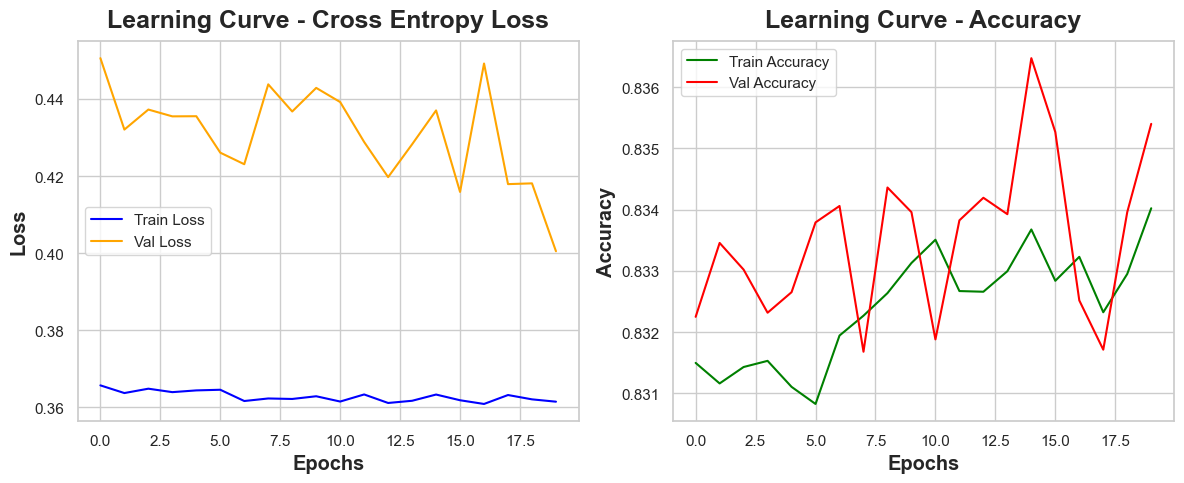

In [22]:
# Plot Learning Curves
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Val Loss', color='orange')
plt.title('Learning Curve - Cross Entropy Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='red')
plt.title('Learning Curve - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()

### What do you think about the learning curves? Does it look like the model underfit or overfit? Was the cross-entropy loss a good stand-in for accuracy?

In [27]:
# Save
model.save("model.h5")

# Load
from tensorflow.keras.models import load_model
model = load_model("model.h5")